<a href="https://colab.research.google.com/github/adityakshay/Machine-Learning/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In [0]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plot

In [0]:
train_X = [[1],[2],[3],[4],[5],[6],[7],[8],[9] ]

In [0]:
train_y = [1,4,9,16,25,36,49,64,81]

In [0]:
from sklearn.linear_model import LinearRegression
from  sklearn import tree 

In [18]:
reg1 = LinearRegression()
reg2=tree.DecisionTreeRegressor()
reg1.fit(train_X, train_y)
reg2.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

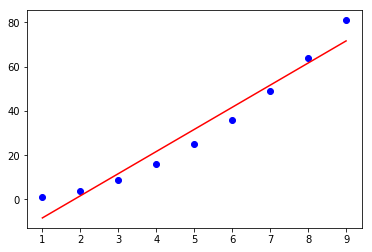

In [10]:
plot.scatter(train_X, train_y, color='blue')
plot.plot(train_X, reg1.predict(train_X), color='red')

In [13]:
reg1.predict([[11]])

array([91.66666667])

In [22]:
reg2.predict([[12]])

array([81.])

# Tensorflow based implementation

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
# Create weights and bias
W = tf.Variable(tf.random_normal(shape=(1,)), name='weight')
b = tf.Variable(tf.random_normal(shape=(1,)), name='bias')

In [0]:
# Define NN parameters
learning_rate = 0.01
epochs =40
display_step = 1

In [0]:
pred = tf.add(tf.multiply(X, W), b)

In [0]:
num_records= len(train_X)

In [0]:
# Define Cost function
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(num_records)

# Have optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Populating the interactive namespace from numpy and matplotlib
Epoch: 1 cost =  14089.25684
Epoch: 2 cost =  14028.77051
Epoch: 3 cost =  14006.77441
Epoch: 4 cost =  13989.44824
Epoch: 5 cost =  13976.38477
Epoch: 6 cost =  13967.18848
Epoch: 7 cost =  13961.48145
Epoch: 8 cost =  13958.90430
Epoch: 9 cost =  13959.15625
Epoch: 10 cost =  13961.93555
Epoch: 11 cost =  13966.98242
Epoch: 12 cost =  13974.04102
Epoch: 13 cost =  13982.89453
Epoch: 14 cost =  13993.33008
Epoch: 15 cost =  14005.16113
Epoch: 16 cost =  14018.21191
Epoch: 17 cost =  14032.32227
Epoch: 18 cost =  14047.35352
Epoch: 19 cost =  14063.17188
Epoch: 20 cost =  14079.65332
Epoch: 21 cost =  14096.69238
Epoch: 22 cost =  14114.18164
Epoch: 23 cost =  14132.03613
Epoch: 24 cost =  14150.17480
Epoch: 25 cost =  14168.52051
Epoch: 26 cost =  14187.00488
Epoch: 27 cost =  14205.57520
Epoch: 28 cost =  14224.16504
Epoch: 29 cost =  14242.73828
Epoch: 30 cost =  14261.23828
Epoch: 31 cost =  14279.63184
Epoch: 32 cost =

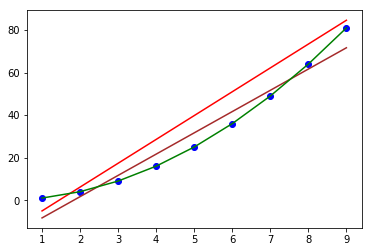

In [77]:
% pylab inline
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(epochs):
    
    for (x, y ) in zip(train_X, train_y):
      sess.run(optimizer, feed_dict={X:x, Y:y})
      
    if(epoch+1) % display_step ==0:
      c =  sess.run(cost, feed_dict={X: train_X, Y:train_y})
      print('Epoch:', '%d' % (epoch+1), 'cost = ', '{:.5f}'.format(c))
      
  print('Completed model training')   
  training_cost = sess.run(cost,  feed_dict={X: train_X, Y:train_y})
  print(' Cost post training= ',training_cost, 'W = ', sess.run(W), 'bias = ', sess.run(b))
  
  plot(train_X, train_y, 'bo')
  plot(train_X, sess.run(W) * train_X + sess.run(b), 'r')
  plot(train_X, reg1.predict(train_X), color='brown')
  plot(train_X, reg2.predict(train_X), color='green')

  print(sess.run(W) * [[11]] + sess.run(b))  
  

In [64]:
for (x, y ) in zip(train_X, train_y):
  print(x,y)

[1] 1
[2] 4
[3] 9
[4] 16
[5] 25
[6] 36
[7] 49
[8] 64
[9] 81
